# Model Description
`A model designed to predict whether someone may or may not have diabetes`  
**Disclaimer: this model can be considered as advice, not a medical assessment, if you suspect that you have diabetes, you should contact your doctor**  
Data source: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset


## dependencies

In [11]:
!pip install pandas numpy pandas-profiling seaborn scikit-learn torch

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
INFO: pip is looking at multiple versions of scikit-learn to determine which version is compatible with other requirements. This could take a while.
  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.4.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached scikit_learn-1.4.0-1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl (9.1 MB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
   --------------------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import numpy as np
import pandas as pd
import seaborn as sbs
import torch

## Data load and view
`In this step, data is loaded and its view and feature correlation are displayed to determine which features are useful`

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

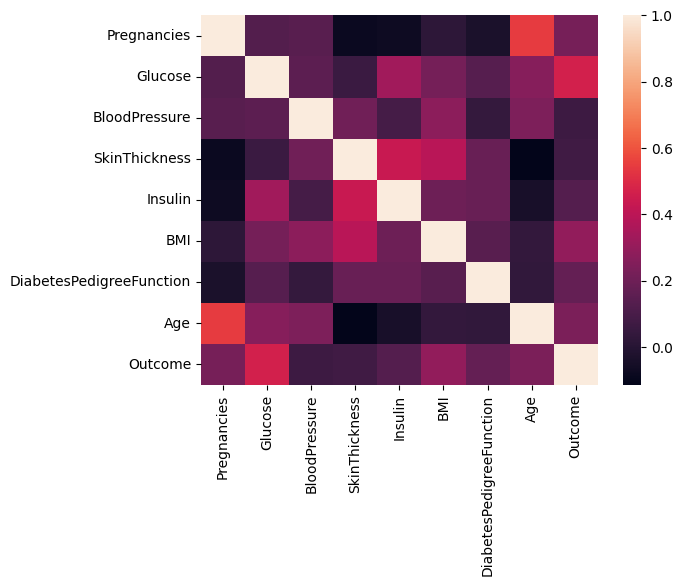

In [27]:
data = pd.read_csv("diabetes.csv")
sbs.heatmap(data.corr())
print(data)

## Data preparing
In this step, the data is prepared and loaded into the tensor

In [30]:
from sklearn.model_selection import train_test_split
## Spliting data into learning and training sample
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [36]:
from torch.utils.data import Dataset, DataLoader

class PandasDataset(Dataset):
    def __init__(self, dataframe):
        self.features = torch.tensor(dataframe[['Age', 'BMI']].values, dtype=torch.float32)
        self.labels = torch.tensor(dataframe['Outcome'].values, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Tworzenie obiektu dataset i loader
train_dataset = PandasDataset(train_df)
test_dataset = PandasDataset(test_df)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)


## Model creation, training and testing
Here data is passed to model, and model is trained for declared number of epochs, then accuracy of model is tested, and finially model is saved

In [55]:
import torch.nn as nn
import torch.optim as optim

# Przykładowy model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(2, 2)  # Warstwa wejściowa z 2 cechami i wyjściowa z 2 klasami

    def forward(self, x):
        return self.fc(x)

model = SimpleModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Trenowanie modelu na zbiorze treningowym
for epoch in range(30):  # Liczba epok
    model.train()  # Ustawienie trybu trenowania
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Testowanie modelu na zbiorze testowym
model.eval()  # Ustawienie trybu ewaluacji
correct = 0
total = 0
with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

Epoch 1, Loss: 3.2746376991271973
Epoch 2, Loss: 0.3956485986709595
Epoch 3, Loss: 0.7443488836288452
Epoch 4, Loss: 0.8185917139053345
Epoch 5, Loss: 0.522905707359314
Epoch 6, Loss: 0.843712329864502
Epoch 7, Loss: 0.30463552474975586
Epoch 8, Loss: 0.784162700176239
Epoch 9, Loss: 0.6816396117210388
Epoch 10, Loss: 1.071000576019287
Epoch 11, Loss: 0.7486891746520996
Epoch 12, Loss: 0.4122135043144226
Epoch 13, Loss: 0.31258541345596313
Epoch 14, Loss: 0.25495070219039917
Epoch 15, Loss: 0.6185288429260254
Epoch 16, Loss: 0.4251282215118408
Epoch 17, Loss: 0.8666925430297852
Epoch 18, Loss: 0.33925968408584595
Epoch 19, Loss: 0.7619906067848206
Epoch 20, Loss: 0.7803496718406677
Epoch 21, Loss: 0.6412017345428467
Epoch 22, Loss: 1.1764887571334839
Epoch 23, Loss: 0.8316588997840881
Epoch 24, Loss: 1.084604263305664
Epoch 25, Loss: 0.7272994518280029
Epoch 26, Loss: 0.34171271324157715
Epoch 27, Loss: 0.22460687160491943
Epoch 28, Loss: 0.49471721053123474
Epoch 29, Loss: 0.431094586

In [34]:
torch.save(model.state_dict(), "model.pth")

### example prediction

In [66]:
def predict(age, bmi):
    # Konwersja danych wejściowych na tensor
    input_tensor = torch.tensor([[age, bmi]], dtype=torch.float32)
    
    # Wykonanie predykcji
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)

    # Zwracanie wyniku predykcji jako odpowiedzi JSON
    return {"prediction": int(predicted.item())}

print(predict(26, 42))

{'prediction': 0}
